In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
o = pd.read_csv("Paralympic_Medal_Count.csv")

In [4]:
o

,Team/Npc,Gold,silver,bronze,total medals,rank by total
0,People's Republic of China,96,60,51,207,1
1,Great Britain,41,38,45,124,2
2,United States of America,37,36,31,104,4
3,RPC,36,33,49,118,3
4,Netherlands,25,17,17,59,9
...,...,...,...,...,...,...
81,Montenegro,0,0,1,1,73
82,Oman,0,0,1,1,73
83,Qatar,0,0,1,1,73
84,Chinese Taipei,0,0,1,1,73


In [7]:
o.drop_duplicates(keep = 'first', inplace=True)

In [8]:
o

,Team/Npc,Gold,silver,bronze,total medals,rank by total
0,People's Republic of China,96,60,51,207,1
1,Great Britain,41,38,45,124,2
2,United States of America,37,36,31,104,4
3,RPC,36,33,49,118,3
4,Netherlands,25,17,17,59,9
...,...,...,...,...,...,...
81,Montenegro,0,0,1,1,73
82,Oman,0,0,1,1,73
83,Qatar,0,0,1,1,73
84,Chinese Taipei,0,0,1,1,73


# Total Number of Medals

In [18]:
total = o[['Gold', 'silver', 'bronze']].sum().reset_index().rename(columns={'index':'medal', 0:'count'})

In [19]:
total

,medal,count
0,Gold,539
1,silver,540
2,bronze,589


<AxesSubplot:xlabel='count', ylabel='medal'>

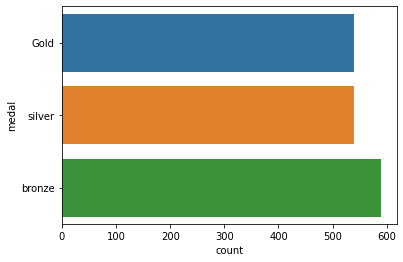

In [29]:
sns.barplot(x="count", y="medal", data=total )

# TOP - 10 - Teams With Highest No of Medals

In [30]:
cols= ['Team/Npc','rank by total','total medals']

In [31]:
cols

['Team/Npc', 'rank by total', 'total medals']

In [44]:
by_rank = o.sort_values('rank by total',ascending=True).reset_index().head(10)

In [45]:
by_rank

,index,Team/Npc,Gold,silver,bronze,total medals,rank by total
0,0,People's Republic of China,96,60,51,207,1
1,1,Great Britain,41,38,45,124,2
2,3,RPC,36,33,49,118,3
3,2,United States of America,37,36,31,104,4
4,5,Ukraine,24,47,27,98,5
5,7,Australia,21,29,30,80,6
6,6,Brazil,22,20,30,72,7
7,8,Italy,14,29,26,69,8
8,4,Netherlands,25,17,17,59,9
9,13,France,11,15,28,54,10


In [46]:
by_rank = by_rank[cols].head(10)

In [47]:
by_rank

,Team/Npc,rank by total,total medals
0,People's Republic of China,1,207
1,Great Britain,2,124
2,RPC,3,118
3,United States of America,4,104
4,Ukraine,5,98
5,Australia,6,80
6,Brazil,7,72
7,Italy,8,69
8,Netherlands,9,59
9,France,10,54


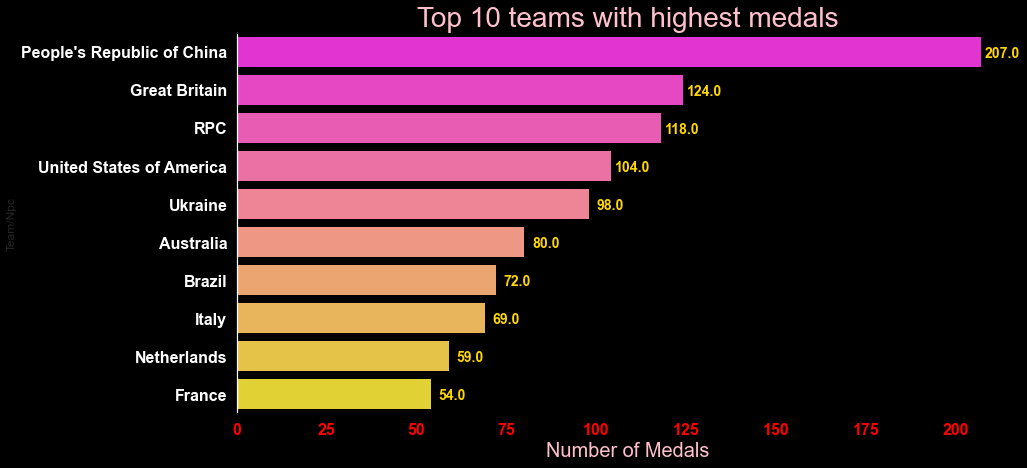

In [48]:
sns.set(rc={'figure.figsize':(14,7)})
plt.figure(facecolor='black')
plt.xticks(rotation=0,fontsize=16,color='red',fontweight='bold')
plt.yticks(fontsize=16,color='white',fontweight='bold')
a = sns.barplot(y='Team/Npc',x='total medals',data = by_rank,palette='spring',edgecolor='none')
for p in a.patches:
    width = p.get_width()
    plt.text(6+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',
             fontsize=14,color='gold',fontweight='bold')
a.set_xlabel("Number of Medals", fontsize = 20,color='pink')
plt.title("Top 10 teams with highest medals",fontsize=28,color='pink')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

# Teams With Different Medals

In [49]:
by_rank = o.sort_values('rank by total',ascending=True).reset_index().head(10)

In [50]:
by_rank

,index,Team/Npc,Gold,silver,bronze,total medals,rank by total
0,0,People's Republic of China,96,60,51,207,1
1,1,Great Britain,41,38,45,124,2
2,3,RPC,36,33,49,118,3
3,2,United States of America,37,36,31,104,4
4,5,Ukraine,24,47,27,98,5
5,7,Australia,21,29,30,80,6
6,6,Brazil,22,20,30,72,7
7,8,Italy,14,29,26,69,8
8,4,Netherlands,25,17,17,59,9
9,13,France,11,15,28,54,10


In [51]:
by_rank = by_rank.drop('index',axis=1)

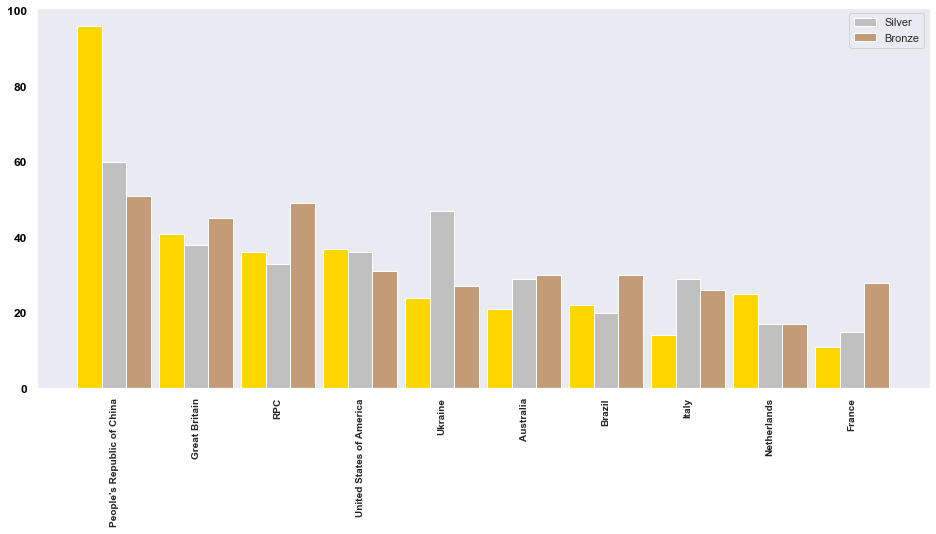

In [63]:
plt.figure(figsize=(16,7))
xpos = np.arange(len(by_rank['Team/Npc'].head(10)))
plt.xticks(xpos,by_rank['Team/Npc'],rotation=90,fontweight='bold',fontsize=10)
plt.bar(xpos-0.3,'Gold',data=by_rank.head(10),color='gold',width=0.3)
plt.bar(xpos,'silver',data=by_rank.head(10),color='#C0C0C0',width=0.3,label='Silver')
plt.bar(xpos+0.3,'bronze',data=by_rank.head(10),color='#C39B77',width=0.3,label='Bronze')
plt.yticks(fontsize=12,color='black',fontweight='bold')
plt.grid(False)
plt.legend()
plt.show()